In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data CSV
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')

# Pastikan kolom 'Date' dibaca sebagai datetime
df['Date'] = pd.to_datetime(df['Date'])

# Cek isi kolom
print(df.columns)


Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')


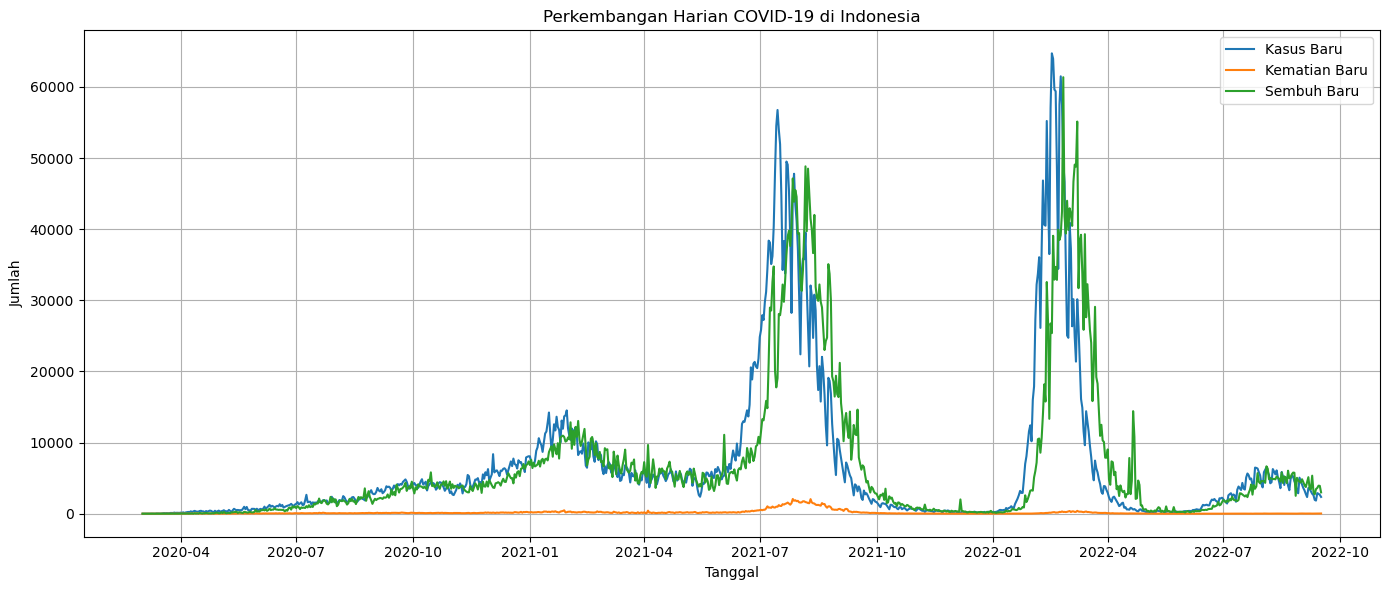

In [7]:
# Filter hanya data nasional
df_nasional = df[df['Location'] == 'Indonesia']

plt.figure(figsize=(14,6))
plt.plot(df_nasional['Date'], df_nasional['New Cases'], label='Kasus Baru')
plt.plot(df_nasional['Date'], df_nasional['New Deaths'], label='Kematian Baru')
plt.plot(df_nasional['Date'], df_nasional['New Recovered'], label='Sembuh Baru')

plt.title('Perkembangan Harian COVID-19 di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Tanggal terakhir dalam data: 2022-09-16 00:00:00
Jumlah provinsi pada 2022-09-16 dengan data: 0
Data kosong di tanggal terakhir. Mencoba mundur 1 hari...


C:\Users\Rahdania\AppData\Local\Temp\ipykernel_12384\1650628257.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Location', x='Total Cases', data=df_sorted.head(20), palette='Reds_r')


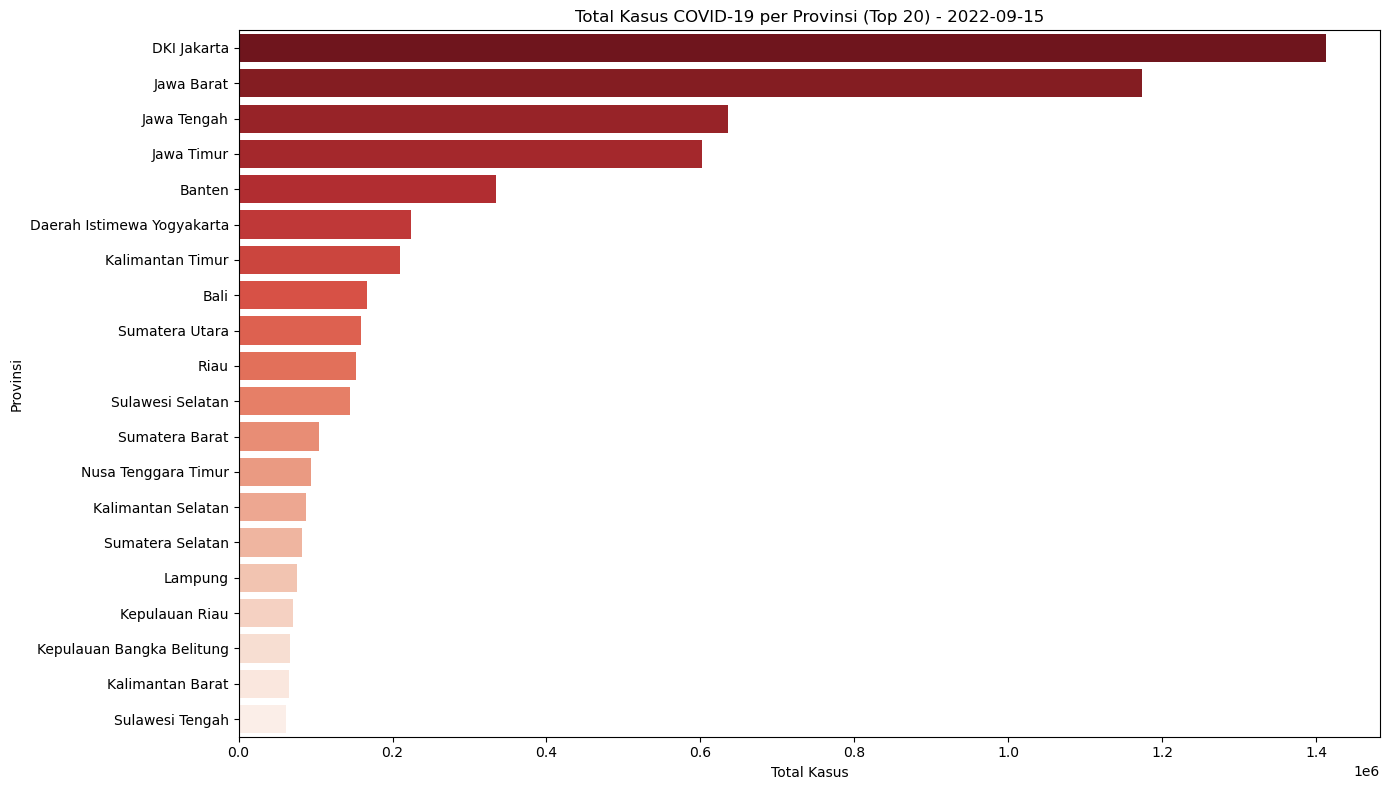

In [10]:
# Ambil tanggal terakhir
latest_date = df['Date'].max()
print(f"Tanggal terakhir dalam data: {latest_date}")

# Filter data provinsi (bukan nasional) dan pastikan 'Total Cases' tidak null
df_latest = df[(df['Date'] == latest_date) & 
               (df['Location'] != 'Indonesia') & 
               (df['Total Cases'].notna())]

# Cek apakah ada data yang lolos filter
print(f"Jumlah provinsi pada {latest_date.date()} dengan data: {len(df_latest)}")

# Jika datanya kosong, coba mundur 1 hari (opsional)
if df_latest.empty:
    print("Data kosong di tanggal terakhir. Mencoba mundur 1 hari...")
    latest_date = latest_date - pd.Timedelta(days=1)
    df_latest = df[(df['Date'] == latest_date) & 
                   (df['Location'] != 'Indonesia') & 
                   (df['Total Cases'].notna())]

# Urutkan dari total kasus tertinggi
df_sorted = df_latest.sort_values(by='Total Cases', ascending=False)

# Plot
plt.figure(figsize=(14,8))
sns.barplot(y='Location', x='Total Cases', data=df_sorted.head(20), palette='Reds_r')
plt.title(f'Total Kasus COVID-19 per Provinsi (Top 20) - {latest_date.date()}')
plt.xlabel('Total Kasus')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()


In [12]:
!pip install folium


In [16]:
import folium
from folium.plugins import MarkerCluster

# Buat peta dasar Indonesia
map_covid = folium.Map(location=[-2.5, 118], zoom_start=5)

# Contoh data lokasi provinsi manual (koordinat diperkirakan)
koordinat_provinsi = {
    'DKI Jakarta': [-6.2, 106.8],
    'Jawa Barat': [-6.9, 107.6],
    'Jawa Tengah': [-7.1, 110.4],
    'Jawa Timur': [-7.5, 112.6],
    'Bali': [-8.4, 115.1],
    # Tambahkan provinsi lain sesuai kebutuhan...
}

# Filter data tanggal terakhir
for prov, coord in koordinat_provinsi.items():
    total = df_latest[df_latest['Location'] == prov]['Total Cases'].values
    if len(total) > 0:
        folium.Marker(
            location=coord,
            popup=f'{prov}: {int(total[0])} kasus',
            icon=folium.Icon(color='red')
        ).add_to(map_covid)

map_covid


C:\Users\Rahdania\AppData\Local\Temp\ipykernel_12384\1636778112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['CFR'] = df_latest['Total Deaths'] / df_latest['Total Cases']
C:\Users\Rahdania\AppData\Local\Temp\ipykernel_12384\1636778112.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Location', x='CFR', data=df_cfr.head(15), palette='Purples_r')


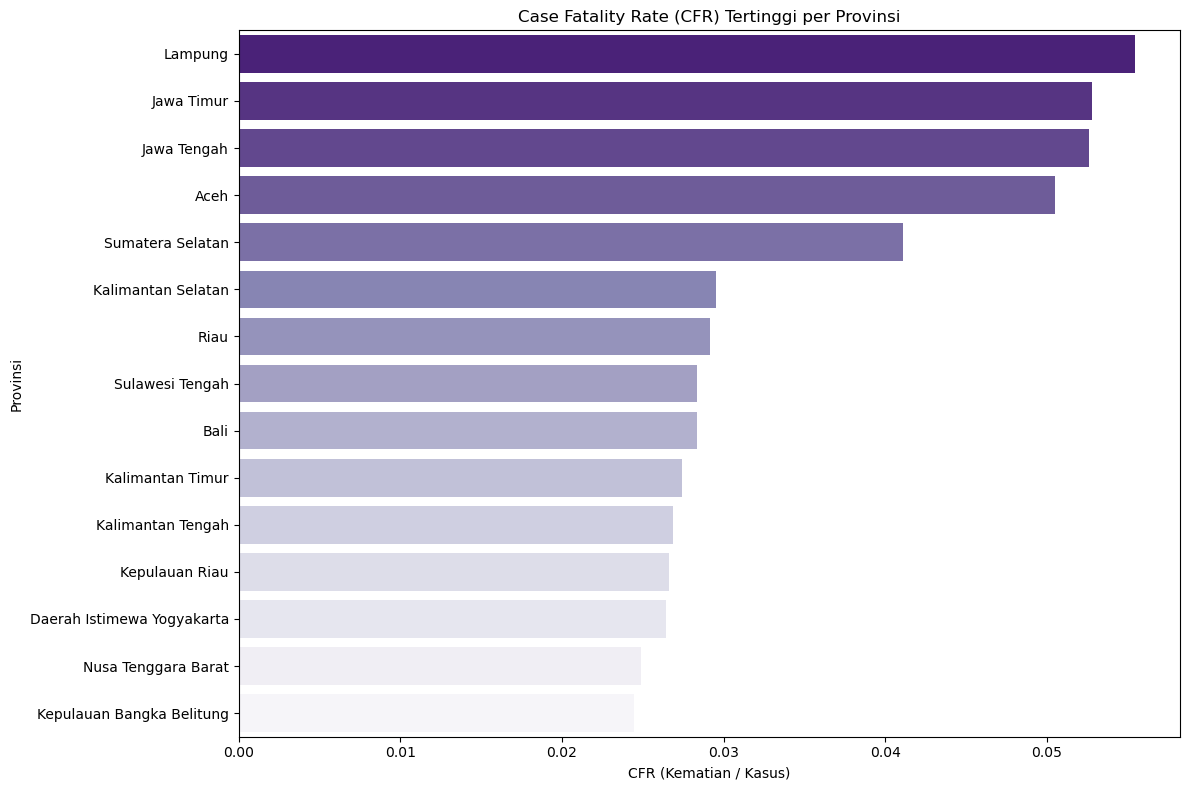

In [14]:
# Tambahkan kolom CFR = total deaths / total cases
df_latest['CFR'] = df_latest['Total Deaths'] / df_latest['Total Cases']

# Urutkan dari CFR tertinggi
df_cfr = df_latest.sort_values(by='CFR', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(y='Location', x='CFR', data=df_cfr.head(15), palette='Purples_r')
plt.title('Case Fatality Rate (CFR) Tertinggi per Provinsi')
plt.xlabel('CFR (Kematian / Kasus)')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()
